In [84]:
import random
import numpy as np
from scipy import optimize as opt
from autograd import grad, jacobian

import matplotlib.pyplot as plt

In [85]:
#data generation
np.random.seed(seed=60)
eps = 0.001
alpha, beta = random.randrange(0, 1), random.randrange(0, 1)
xk = [i / 100 for i in range(100)]
yk = [alpha * i + beta + np.random.normal(0, 1) for i in xk]

In [86]:
def linear_approximation(a,b):
    x = []
    y = []
    for k in range(100):
        x.append(k / 100)
        y.append(a * x[k] + b)
    return x, y

def rational_approximation(a,b):
    x = []
    y = []
    for k in range(100):
        x.append(k / 100)
        y.append(a / (1 + b * x[k]))
    return x, y

In [87]:
def lin_apploximant(x,xk,yk):  
    a = x[0]
    b = x[1]
    D_linear = 0
    for k in range(100):
        D_linear += (a * xk[k] + b - yk[k]) ** 2
    return D_linear

def rat_apploximant(x,xk,yk):  
    a = x[0]
    b = x[1]
    D_rational = 0
    for k in range(100):
        D_rational += (a / (1 + b * xk[k]) - yk[k]) ** 2
    return D_rational

In [88]:
def derivative_lin_a(x,xk,yk):  
    a = x[0]
    b = x[1]
    d_deriv = 0
    for k in range(100):
        d_deriv += 2 * xk[k] * (a * xk[k] + b - yk[k])
    return d_deriv

def derivative_lin_b(x,xk,yk):  
    a = x[0]
    b = x[1]
    d_deriv = 0
    for k in range(100):
        d_deriv += 2 * (a * xk[k] + b - yk[k]) 
    return d_deriv

def derivative_rat_a(x,xk,yk):  
    a = x[0]
    b = x[1]
    d_deriv = 0
    for k in range(100):
        d_deriv += 2 * ( a / (1 + b * xk[k]) - yk[k]) / (1 + b * xk[k])
    return d_deriv

def derivative_rat_b(x,xk,yk):  
    a = x[0]
    b = x[1]
    d_deriv = 0
    for k in range(100):
        d_deriv += - 2 * (a / (1 + b * xk[k]) - yk[k]) * xk[k] * a  / (1 + b * xk[k]) ** 2
    return d_deriv

In [89]:
def gradient_descent(x, function, xk, yk, eps, linear,max_iters):
    a = x[0]
    b = x[1]
    a_prev = x[0] - 1
    b_prev = x[1] - 1
    rate = 0.01 # Learning rate
    iteration = 0 
    if linear == True:
        while abs(lin_apploximant([a,b], xk, yk) - lin_apploximant([a_prev, b_prev], xk, yk)) > eps and iteration < max_iters:
            a_prev, b_prev = a, b #Store current x value in prev_x
            a = a - rate * derivative_lin_a([a, b], xk, yk)
            b = b - rate * derivative_lin_b([a, b], xk, yk)
            iteration += 1
        print("The local minimum:[{0}, {1}]".format(a, b))
        print("Number of iteration:", iteration)
        
    else:
        while abs(rat_apploximant([a,b], xk, yk) - rat_apploximant([a_prev, b_prev], xk, yk)) > eps and iteration < max_iters:
            a_prev, b_prev = a, b 
            a = a - rate * derivative_rat_a([a, b], xk, yk)
            b = b - rate * derivative_rat_b([a, b], xk, yk)
            iteration += 1
        print("The local minimum:[{0}, {1}]".format(a, b))
        print("Number of iteration:", iteration)
    return a,b


In [90]:
res_cg_lin = opt.minimize(lin_apploximant, [0, 0], args = (xk, yk), method="CG", tol = 0.001)
res_cg_rat = opt.minimize(rat_apploximant, [0, 0], args = (xk, yk), method="CG", tol = 0.001)

In [91]:
res_newton_cg_lin = opt.minimize(lin_apploximant, [0, 0], args = (xk, yk), method="Newton-CG", jac = jacobian(lin_apploximant), tol=0.001)
res_newton_cg_rat = opt.minimize(rat_apploximant, [0, 0], args = (xk, yk), method="Newton-CG", jac = jacobian(rat_apploximant), tol=0.001)

In [92]:
def lin_approximant_2(x,xk,yk): 
  a = x[0]
  b = x[1] 
  return [(a*xk[i] + b - yk[i]) for i in range(0,100)]

def rat_approximant_2(x,xk,yk): 
  a = x[0]
  b = x[1] 
  return [(a/(1+b*xk[i])-yk[i]) for i in range(0,100)]

In [93]:
res_lm_lin = opt.least_squares(lin_approximant_2,[0,0], args = (xk,yk), method='lm')
res_lm_rat = opt.least_squares(rat_approximant_2,[0,0], args = (xk,yk), method='lm')


**Results of linear function approximation**

In [94]:
print("Gradient descent")
res_grad_descent_lin = gradient_descent([0, 0], lin_apploximant, xk, yk, 0.001, True, 10000)

Gradient descent
The local minimum:[0.24052665261723205, -0.019731290523551916]
Number of iteration: 11


In [95]:
print("Conjugate gradient method")
print(res_cg_lin)

Conjugate gradient method
     fun: 112.81079160031125
     jac: array([-1.90734863e-06, -9.53674316e-07])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([ 0.25074217, -0.024141  ])


In [96]:
print("Newton’s method ")
print(res_newton_cg_lin)

Newton’s method 
     fun: 112.81079160031109
     jac: array([1.27028891e-08, 2.07647248e-08])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 54
    nhev: 0
     nit: 2
    njev: 54
  status: 2
 success: False
       x: array([ 0.25074215, -0.02414101])


In [97]:
print("Levenberg-Marquardt algorithm")
print(res_lm_lin)

Levenberg-Marquardt algorithm
 active_mask: array([0, 0])
        cost: 56.40539580015558
         fun: array([ 0.89762999,  0.56468405, -1.18312531,  1.22510522,  1.9711189 ,
       -1.3183128 , -0.74690354, -0.38570034, -0.00507084,  1.10346061,
        0.94424039,  0.72381106, -2.27534135, -0.0265118 ,  0.68553156,
       -0.20466751, -1.15090629, -0.26166315, -0.53986019, -0.03411436,
       -0.23903548,  2.23948243,  0.05968371,  0.29702245, -1.27605325,
       -0.90485362, -0.79870901,  0.82309668,  0.00777728, -0.46540746,
        0.05531983,  2.8668317 ,  0.7948911 , -1.06080805, -0.32494094,
        1.16069392, -1.14191955, -0.52260936,  0.01074993, -0.45511179,
       -1.89879019,  0.3830512 , -1.03769716, -0.84846702, -0.74205403,
        0.06239543,  1.08841068,  2.22515568,  1.75802101,  0.46526057,
        0.07201386, -0.67766694, -0.87502889, -0.37593368,  1.88752849,
        0.20682124, -0.74493459,  0.75150912,  2.0270654 ,  0.74112789,
       -1.26997095, -1.49317216,

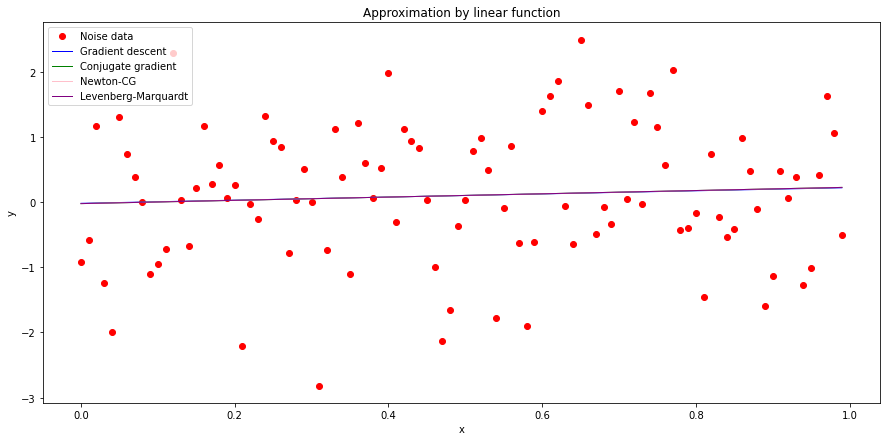

In [98]:
plt.figure(figsize=(15,7)) 
plt.title('Approximation by linear function')   
plt.xlabel('x') 
plt.ylabel('y') 
#plt.legend(['Linear approximation by brute force','Linear approximation bu Nelder-Mead', 
            #'Linear approximation by Gauss', 'Noisy data'])
plt.plot(xk, yk,'o', label = "Noise data", color='red') # noise data 
plt.plot(linear_approximation(res_grad_descent_lin[0], res_grad_descent_lin[1])[0],
         linear_approximation(res_grad_descent_lin[0], res_grad_descent_lin[1])[1],
         linewidth = 1, label = "Gradient descent", color='blue') #drew approx function
plt.plot(linear_approximation(*res_cg_lin.x)[0],
         linear_approximation(*res_cg_lin.x)[1],
         linewidth = 1, label = "Conjugate gradient", color='green')
plt.plot(linear_approximation(*res_newton_cg_lin.x)[0],
         linear_approximation(*res_newton_cg_lin.x)[1],
         linewidth = 1, label = "Newton-CG", color='pink')
plt.plot(linear_approximation(*res_lm_lin.x)[0],
         linear_approximation(*res_lm_lin.x)[1],
         linewidth = 1, label = "Levenberg-Marquardt", color='purple')

plt.legend(loc='upper left') #show legend
plt.show() # show plot

**Results of rational function approximation**

In [101]:
print("Gradient descent")
res_grad_descent_rat = gradient_descent([0.5,0.5], rat_apploximant, xk, yk, 0.001, False, 10000)

Gradient descent
The local minimum:[0.08790827077424707, -0.3324814066319545]
Number of iteration: 214


In [81]:
print("Conjugate gradient method")
print(res_cg_rat)

Conjugate gradient method
     fun: 113.16044498966421
     jac: array([-1.84059143e-04,  1.90734863e-05])
 message: 'Optimization terminated successfully.'
    nfev: 68
     nit: 7
    njev: 17
  status: 0
 success: True
       x: array([ 0.07316307, -0.54794457])


In [82]:
print("Newton’s method ")
print(res_newton_cg_rat)

Newton’s method 
     fun: 113.16044498962076
     jac: array([ 0.00144649, -0.00035475])
 message: 'Optimization terminated successfully.'
    nfev: 13
    nhev: 0
     nit: 10
    njev: 56
  status: 0
 success: True
       x: array([ 0.07316339, -0.54794599])


In [83]:
print("Levenberg-Marquardt algorithm")
print(res_lm_rat)

Levenberg-Marquardt algorithm
 active_mask: array([0, 0])
        cost: 56.58022249521545
         fun: array([ 0.99493712,  0.65988687, -1.09002234,  1.31611288,  2.06003588,
       -1.23148182, -0.66215378, -0.30302694,  0.07553114,  1.18199619,
        1.02071468,  0.79822927, -2.20297392,  0.04381023,  0.75381368,
       -0.13841972, -1.08668715, -0.19946688, -0.47968089,  0.02405396,
       -0.18287202,  2.29364725,  0.11185622,  0.34720912, -1.22784584,
       -0.85861876, -0.75443988,  0.86540706,  0.04813601, -0.42699314,
        0.09179713,  2.9013795 ,  0.82751708, -1.03009605, -0.29613493,
        1.18760209, -1.11690089, -0.49947172,  0.03201522, -0.43571   ,
       -1.88124287,  0.3987533 , -1.02383088, -0.83642692, -0.73183028,
        0.0708129 ,  1.09503213,  2.22999161,  1.76108215,  0.4665579 ,
        0.0715586 , -0.67986329, -0.87895461, -0.38157675,  1.88018037,
        0.19778066, -0.75565475,  0.73912257,  2.01302597,  0.72544942,
       -1.28727428, -1.51208582,

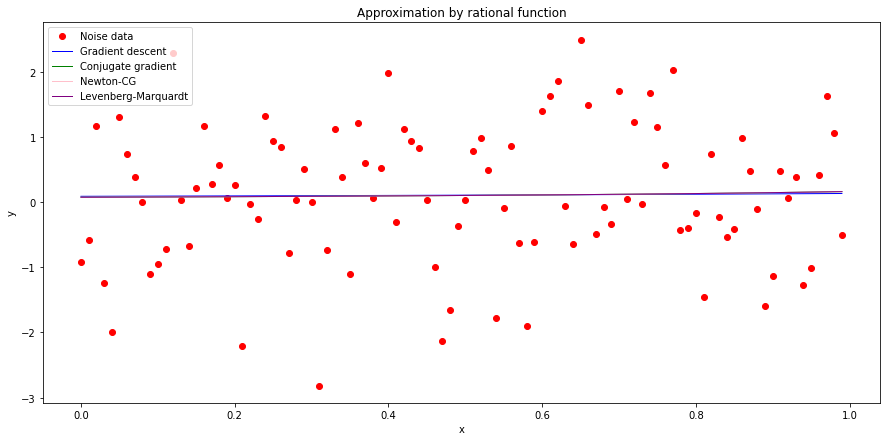

In [102]:
plt.figure(figsize=(15,7)) 
plt.title('Approximation by rational function')   
plt.xlabel('x') 
plt.ylabel('y') 

plt.plot(xk, yk,'o', label = "Noise data", color='red') # noise data 
plt.plot(rational_approximation(res_grad_descent_rat[0], res_grad_descent_rat[1])[0],
         rational_approximation(res_grad_descent_rat[0], res_grad_descent_rat[1])[1],
         linewidth = 1, label = "Gradient descent", color='blue') 
plt.plot(rational_approximation(*res_cg_rat.x)[0],
         rational_approximation(*res_cg_rat.x)[1],
         linewidth = 1, label = "Conjugate gradient", color='green')
plt.plot(rational_approximation(*res_newton_cg_rat.x)[0],
         rational_approximation(*res_newton_cg_rat.x)[1],
         linewidth = 1, label = "Newton-CG", color='pink')
plt.plot(rational_approximation(*res_lm_rat.x)[0],
         rational_approximation(*res_lm_rat.x)[1],
         linewidth = 1, label = "Levenberg-Marquardt", color='purple')

plt.legend(loc='upper left') #show legend
plt.show() # show plot